# RAVDESS
Train and test the RAVDESS dataset using librosa

In [11]:
import librosa
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn import preprocessing

In [12]:
import pickle

## Import feature dataframe

In [13]:
pickle_in = open("ravdess.pickle", "rb")  
feat_df = pickle.load(pickle_in)

In [17]:
feat_df.shape

(1440, 3013)

## Create test/train datasets

In [19]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [20]:
# shuffle dataframe
shuff_df = shuffle(feat_df, random_state=42)

In [21]:
# fill nans with 0
shuff_df.fillna(0, inplace=True);

In [22]:
# split data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(shuff_df.iloc[:, 0:-1], 
                                                    shuff_df.iloc[:, -1], 
                                                    test_size=0.2, 
                                                    random_state=42)

In [23]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,3002,3003,3004,3005,3006,3007,3008,3009,3010,3011
476,-1.137741,-1.137741,-1.137741,-1.137741,-1.137741,-1.137741,-1.137741,-1.135654,-0.755279,-0.787950,...,-0.005367,-0.118071,-0.234989,0.404110,-0.150718,0.336893,0.004215,0.020264,0.095346,0.147746
165,-0.806056,-0.451760,-0.521320,-1.187864,-0.580390,-0.736833,-0.960364,-1.093079,-0.814147,-0.739474,...,1.018340,0.362166,0.491419,0.493331,-0.044168,0.153172,0.418012,0.286294,0.420857,0.286240
892,-1.005026,-0.995199,-0.977661,-0.941526,-0.863234,-1.011180,-0.997660,-1.049385,-0.970068,-0.957406,...,1.017802,0.861882,0.992942,0.953610,0.861716,0.883808,0.884896,1.379876,1.148302,0.716343
367,-1.016982,-0.938150,-0.940884,-0.971534,-0.886782,-1.008615,-1.048366,-0.952793,-0.937064,-1.076166,...,0.593987,0.807309,0.942128,0.406368,0.412704,0.662555,0.751996,0.643216,0.692916,0.972783
530,-1.199059,-1.079020,-1.050394,-0.998611,-0.788211,-0.903109,-0.857032,-0.853253,-0.757049,-0.879457,...,0.914360,1.201183,1.830611,1.778638,1.449676,1.209666,1.193823,1.386919,1.532290,0.959098


In [24]:
y_train.head()

476      happy
165       calm
892    fearful
367      happy
530        sad
Name: emotion_label, dtype: object

In [25]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,3002,3003,3004,3005,3006,3007,3008,3009,3010,3011
203,-1.293109,-1.293109,-1.293109,-1.293109,-1.293109,-1.293109,-1.293109,-1.289473,-1.246201,-1.531030,...,0.019344,-0.987022,-0.367719,-1.110641,-1.634195,-1.325273,-1.047410,0.017383,0.116741,0.307699
311,-1.094878,-1.094878,-1.094878,-1.094878,-1.094878,-1.094878,-1.094878,-1.094878,-1.094878,-1.094878,...,0.769931,1.055663,0.389687,1.052431,1.098841,1.131269,1.109184,1.107196,1.011312,1.000297
5,-1.298954,-1.263344,-1.144272,-1.293848,-1.020600,-1.188165,-1.196424,-1.106546,-1.149027,-1.143802,...,0.691870,0.697725,0.605531,0.679901,0.899505,0.806052,1.044136,0.557393,0.973441,1.437218
198,-1.295814,-1.081157,-1.310013,-1.314510,-1.252583,-1.287449,-1.321579,-1.632728,-1.369345,-1.435890,...,-0.675221,-0.058680,0.210139,0.278220,0.194024,1.866050,3.431584,1.504291,0.630695,-0.501582
120,-1.351795,-1.351795,-1.328592,-1.351795,-1.351795,-1.351795,-1.351795,-1.304018,-1.294368,-1.351795,...,-0.135700,-0.241063,-0.546274,-0.257327,0.080626,-0.095705,-0.067215,-0.086048,-0.122995,-0.119630


In [26]:
y_test.head()

203       calm
311      happy
5      neutral
198       calm
120       calm
Name: emotion_label, dtype: object

# SVM Classifier Modeling

In [27]:
from sklearn import svm
from sklearn import metrics

### Polynomial SVM

In [28]:
# optimized parameters using gridsearch
poly_svm = svm.SVC(kernel='poly', degree=2, C=10, gamma=0.001, probability=True, random_state=42)
poly_svm.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma=0.001, kernel='poly',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

## Accuracy and Confusion Matrix

### Output Metrics

In [24]:
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, poly_svm.predict(X_test)))
print(metrics.classification_report(y_test, poly_svm.predict(X_test)))

Accuracy: 0.594
             precision    recall  f1-score   support

      angry       0.55      0.76      0.64        37
       calm       0.79      0.74      0.77        42
    disgust       0.57      0.60      0.58        35
    fearful       0.64      0.60      0.62        30
      happy       0.53      0.48      0.50        42
    neutral       0.86      0.57      0.69        21
        sad       0.55      0.55      0.55        44
  surprised       0.46      0.46      0.46        37

avg / total       0.60      0.59      0.59       288



In [25]:
svm_cm = metrics.confusion_matrix(y_test, poly_svm.predict(X_test))

In [26]:
svm_cm

array([[28,  0,  2,  0,  2,  1,  1,  3],
       [ 1, 31,  4,  0,  2,  0,  4,  0],
       [ 8,  0, 21,  1,  0,  0,  5,  0],
       [ 1,  2,  1, 18,  1,  0,  2,  5],
       [ 6,  0,  1,  1, 20,  0,  4, 10],
       [ 0,  4,  0,  1,  3, 12,  0,  1],
       [ 6,  1,  3,  3,  5,  1, 24,  1],
       [ 1,  1,  5,  4,  5,  0,  4, 17]])

### Plot confusion matrix

In [28]:
df_cm = pd.DataFrame(svm_cm, index = [i for i in poly_svm.classes_],
                  columns = [i for i in poly_svm.classes_])

In [30]:
# normalize data for heatmap
df_norm_cm=(df_cm-df_cm.mean())/df_cm.std()

In [27]:
import seaborn as sns

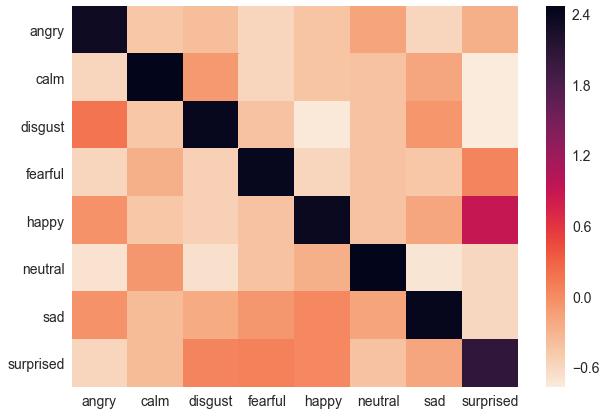

In [31]:
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
cmap = sns.cm.rocket_r
cm_hm = sns.heatmap(df_norm_cm, cmap=cmap)# font size

## Export trained SVM model

In [38]:
with open("emo_pred.pkl", "wb") as f:
    pickle.dump(poly_svm, f)

In [ ]:
with open("labels.pkl", "wb") as f:
    pickle.dump(poly_svm.classes_, f)